<a href="https://colab.research.google.com/github/IzadoraSC/regioes_microclimaticas/blob/main/Regioes_Microclimaticas_v01_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de regiões microclimáticas
1. Obtenção dos dados (utilizando GEE):

2. Classificação não supervisionada (Kmeans);

3. Referências.

Script: Izadora S. de Carvalho.

Autores do artigo: Izadora S. de Carvalho, Swanni T. Alvarado, Patrick Costa Silva, Tiago Massi Ferraz.

Obs: O código pode ser aplicado para outras áreas de estudos, estamos abertos a colaborações e sugestões.

Contato: izadoraflorestal@gmail.com / izadorasccs@gmail.com

Repositório para disponibilização e manutenção de código: [Github](https://github.com/IzadoraSC/regioes_microclimaticas)

##Conectando Drive

In [ ]:
# Conectando Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1   Obtendo dados do Google Earth Engine (GEE).
Obtendo as imagens/rasters que serão utilizados nas etapas de geração dos Índices Espectrais:
  - Dados SRTM
  - Dados TerraClimate
    - evapotranspiração de referência;
    - precitação acumulada;
    - umidade do solo;
    - temperatura mínima;
    - temperatura máxima;
    - deficit de pressão de vapor;
    - velocidade do vento.
---

### Instalando bibliotecas

In [ ]:
# Instalando bibliotecas
!pip install spyndex -q
!pip install spectral -q
!pip install rasterio -q
!pip install matplotlib-scalebar -q
!pip install cartopy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.7/728.7 kB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 109.2 MB/s eta 0:00:00


In [ ]:
#!pip list

### Importar as bibliotecas

In [ ]:
#Importando bibliotecas

#GEE
import ee
import geemap

#Indices
import spyndex
import xarray as xr
import matplotlib.pyplot as plt
from rasterio import plot
import rasterio as rio
import pandas as pd
import seaborn as sns
import numpy as np
import dask.array as da


import spectral
import eemont
import geemap
import geemap.colormaps as cm

import functools
import tifffile as tif

#Outras
import json
import geopandas as gpd
import os
#import geobr
import altair as alt ##biblioteca de visualização(gráficos)


# Plotando figuras
from spectral import *
from spectral import imshow
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)
from matplotlib.colors import Normalize
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import FancyArrowPatch, Rectangle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Autenticação da conta do GEE

In [ ]:
# Autenticação padrão da conta do GEE
ee.Authenticate()
ee.Initialize(project='ee-izadorasc')  ## 'project' é individual para cada usuário


### **Data Image**

#### **Informações sobre os sensores e outras**

In [ ]:
########### LANDSAT ##############

# Reflectância de Superficíe Data

# Landsat 4 TM (Aug 22, 1982 - Jun 24, 1993)
  # USGS Landsat 4 Level 2, Collection 2, Tier 1
  # sensor = "LANDSAT/LT04/C02/T1_L2"

# Landsat 5 TM (Mar 16, 1984 - May 05, 2012)
  # USGS Landsat 5 Level 2, Collection 2, Tier 1
  # sensor = "LANDSAT/LT05/C02/T1_L2"

# Landsat 7 ETM+ (May 28, 1999 - Jul 15, 2023)
  # USGS Landsat 7 Level 2, Collection 2, Tier 1
  # sensor = "LANDSAT/LE07/C02/T1_L2"

# Landsat 8 OLI (Mar 18, 2013 - present)
  # USGS Landsat 8 Level 2, Collection 2, Tier 1
  # sensor = "LANDSAT/LC08/C02/T1_L2"

# Landsat 9 OLI (Out 31, 2021 - present)
  # USGS Landsat 9 Level 2, Collection 2, Tier 1
  # sensor = "LANDSAT/LC09/C02/T1_L2"

# scale factor = 2.75e-05
# scale factor surface temperature = 0.00341802

################## SENTINEL ########################

# Harmonized Sentinel-2 MSI: MultiSpectral Instrument, Level-1C (Jun 27, 2015 - present)
#Top-of-Atmosphere Reflectance
#ee.ImageCollection("COPERNICUS/S2_HARMONIZED")
# https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_HARMONIZED

# sensor = "COPERNICUS/S2_HARMONIZED"

# Harmonized Sentinel-2 MSI: MultiSpectral Instrument, Level-2A (Mar 28, 2017 - present)
# Surface Reflectance
#ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
#https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR_HARMONIZED

# sensor = "COPERNICUS/S2_SR_HARMONIZED"

################## TERRACLIMATE ########################
# sensor = "IDAHO_EPSCOR/TERRACLIMATE"

# TerraClimate: Monthly Climate and Climatic Water Balance for Global Terrestrial
# Surfaces, University of Idaho
# https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE#bands

################## SRTM ##########################
# sensor = "USGS/SRTMGL1_003"

# NASA SRTM Digital Elevation 30m
# https://developers.google.com/earth-engine/datasets/catalog/USGS_SRTMGL1_003#citations


############################################
# Alguns formatos de dados
# .toDouble()  #64-bit float
# .toFloat()  #32-bit float
# .toInt16()  # signed 16-bit integer
# .toInt32() # signed 32-bit integer
# .toUint16() # unsigned 16-bit integer

####Visualização dos dados: paletas de cores.

In [ ]:
#Visualização dos dados

#LANDSAT
VisLS457_falseColor = {
  'min': 0,
  'max': 0.3,
  'gamma': 1,
  'opacity': 1,
  'bands': ['SR_B5', 'SR_B4', 'SR_B3']}

VisLS89_falseColor = {
  'min': 0,
  'max': 0.3,
  'gamma': 1,
  'opacity': 1,
  'bands': ['SR_B6', 'SR_B5', 'SR_B4']}

VisLS89_trueColor = {
    'min': 0.0,
    'max': 0.3,
    'gamma': 1,
    'opacity': 1,
    'bands': ['SR_B4', 'SR_B3', 'SR_B2']}


# ÍNDICES

##Colors map
visNDVI = cm.palettes.ndvi
##Definindo os parâmetros
vis_NDVI = {
  'min': 0,
  'max': 1,
  'palette': visNDVI}

VisNDVI = {
  'min': 0,
  'max': 1,
  'palette': ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
               '74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']
  }

##Definindo os parâmetros
VisNDWI = {
    'bands': ['NDWI'],
    'palette': ['#ece7f2', '#d0d1e6', ' #a6bddb', ' #74a9cf', ' #3690c0', ' #0570b0', ' #045a8d', '#023858'],
    'min': -0.7546916749172777,
    'max': -0.27315915803905233,
    'opacity': 1.0,
    'gamma': 1.0}


paletteVisSRTM = {
  'min': 0,
  'max': 610,
  'bands': ['elevation'],
  'palette': ['0000ff', '00ffff', 'ffff00', 'ff0000', 'ffffff']}


# Dados TerraClimate

evap_vis = {'palette': ['1a3678', '2955bc', '5699ff', '8dbae9', 'acd1ff', 'caebff', 'e5f9ff', 'fdffb4', 'ffe6a2', 'ffc969', 'ffa12d', 'ff7c1f', 'ca531a', 'ff0000', 'ab0000'],
            'min': 109.0,
            'max': 114.0
              }
# 'min': 106.3, 'max': 110.6



# ['#006837', ' #016a38', ' #026c39', ' #036e3a', ' #04703b', ' #05713c', ' #06733d', ' #07753e', ' #08773f', ' #097940', ' #0a7b41', ' #0b7d42', ' #0c7f43', ' #0d8044', ' #0e8245', ' #0f8446', ' #108647', ' #118848', ' #128a49', ' #138c4a', ' #148e4b', ' #15904c', ' #16914d', ' #17934e', ' #18954f', ' #199750', ' #1b9950', ' #1e9a51', ' #219c52', ' #249d53', ' #279f53', ' #2aa054', ' #2da155', ' #30a356', ' #33a456', ' #36a657', ' #39a758', ' #3ca959', ' #3faa59', ' #42ac5a', ' #45ad5b', ' #48ae5c', ' #4bb05c', ' #4eb15d', ' #51b35e', ' #54b45f', ' #57b65f', ' #5ab760', ' #5db961', ' #60ba62', ' #63bc62', ' #66bd63', ' #69be63', ' #6bbf64', ' #6ec064', ' #70c164', ' #73c264', ' #75c465', ' #78c565', ' #7ac665', ' #7dc765', ' #7fc866', ' #82c966', ' #84ca66', ' #87cb67', ' #89cc67', ' #8ccd67', ' #8ecf67', ' #91d068', ' #93d168', ' #96d268', ' #98d368', ' #9bd469', ' #9dd569', ' #a0d669', ' #a2d76a', ' #a5d86a', ' #a7d96b', ' #a9da6c', ' #abdb6d', ' #addc6f', ' #afdd70', ' #b1de71', ' #b3df72', ' #b5df74', ' #b7e075', ' #b9e176', ' #bbe278', ' #bde379', ' #bfe47a', ' #c1e57b', ' #c3e67d', ' #c5e67e', ' #c7e77f', ' #c9e881', ' #cbe982', ' #cdea83', ' #cfeb85', ' #d1ec86', ' #d3ec87', ' #d5ed88', ' #d7ee8a', ' #d9ef8b', ' #daf08d', ' #dcf08f', ' #ddf191', ' #dff293', ' #e0f295', ' #e2f397', ' #e3f399', ' #e5f49b', ' #e6f59d', ' #e8f59f', ' #e9f6a1', ' #ebf7a3', ' #ecf7a6', ' #eef8a8', ' #eff8aa', ' #f1f9ac', ' #f2faae', ' #f4fab0', ' #f5fbb2', ' #f7fcb4', ' #f8fcb6', ' #fafdb8', ' #fbfdba', ' #fdfebc', ' #feffbe', ' #fffebe', ' #fffdbc', ' #fffcba', ' #fffbb8', ' #fffab6', ' #fff8b4', ' #fff7b2', ' #fff6b0', ' #fff5ae', ' #fff3ac', ' #fff2aa', ' #fff1a8', ' #fff0a6', ' #feefa3', ' #feeda1', ' #feec9f', ' #feeb9d', ' #feea9b', ' #fee999', ' #fee797', ' #fee695', ' #fee593', ' #fee491', ' #fee28f', ' #fee18d', ' #fee08b', ' #fede89', ' #fedc88', ' #feda86', ' #fed884', ' #fed683', ' #fed481', ' #fed27f', ' #fed07e', ' #fece7c', ' #fecc7b', ' #feca79', ' #fec877', ' #fdc776', ' #fdc574', ' #fdc372', ' #fdc171', ' #fdbf6f', ' #fdbd6d', ' #fdbb6c', ' #fdb96a', ' #fdb768', ' #fdb567', ' #fdb365', ' #fdb163', ' #fdaf62', ' #fdad60', ' #fcaa5f', ' #fca85e', ' #fca55d', ' #fba35c', ' #fba05b', ' #fb9d59', ' #fa9b58', ' #fa9857', ' #fa9656', ' #f99355', ' #f99153', ' #f98e52', ' #f88c51', ' #f88950', ' #f8864f', ' #f7844e', ' #f7814c', ' #f67f4b', ' #f67c4a', ' #f67a49', ' #f57748', ' #f57547', ' #f57245', ' #f47044', ' #f46d43', ' #f36b42', ' #f26841', ' #f16640', ' #ef633f', ' #ee613e', ' #ed5f3c', ' #ec5c3b', ' #eb5a3a', ' #ea5739', ' #e95538', ' #e75337', ' #e65036', ' #e54e35', ' #e44c34', ' #e34933', ' #e24731', ' #e14430', ' #e0422f', ' #de402e', ' #dd3d2d', ' #dc3b2c', ' #db382b', ' #da362a', ' #d93429', ' #d83128', ' #d62f27', ' #d42d27', ' #d22b27', ' #d02927', ' #ce2827', ' #cc2627', ' #ca2427', ' #c82227', ' #c62027', ' #c41e27', ' #c21c27', ' #c01a27', ' #be1827', ' #bd1726', ' #bb1526', ' #b91326', ' #b71126', ' #b50f26', ' #b30d26', ' #b10b26', ' #af0926', ' #ad0826', ' #ab0626', ' #a90426', ' #a70226', ' #a50026']

precip_vis = {'palette': ['#f7fbff', ' #f6faff', ' #f5fafe', ' #f5f9fe', ' #f4f9fe', ' #f3f8fe', ' #f2f8fd', ' #f2f7fd', ' #f1f7fd', ' #f0f6fd', ' #eff6fc', ' #eef5fc', ' #eef5fc', ' #edf4fc', ' #ecf4fb', ' #ebf3fb', ' #eaf3fb', ' #eaf2fb', ' #e9f2fa', ' #e8f1fa', ' #e7f1fa', ' #e7f0fa', ' #e6f0f9', ' #e5eff9', ' #e4eff9', ' #e3eef9', ' #e3eef8', ' #e2edf8', ' #e1edf8', ' #e0ecf8', ' #dfecf7', ' #dfebf7', ' #deebf7', ' #ddeaf7', ' #dceaf6', ' #dce9f6', ' #dbe9f6', ' #dae8f6', ' #d9e8f5', ' #d9e7f5', ' #d8e7f5', ' #d7e6f5', ' #d6e6f4', ' #d6e5f4', ' #d5e5f4', ' #d4e4f4', ' #d3e4f3', ' #d3e3f3', ' #d2e3f3', ' #d1e2f3', ' #d0e2f2', ' #d0e1f2', ' #cfe1f2', ' #cee0f2', ' #cde0f1', ' #cddff1', ' #ccdff1', ' #cbdef1', ' #cadef0', ' #caddf0', ' #c9ddf0', ' #c8dcf0', ' #c7dcef', ' #c7dbef', ' #c6dbef', ' #c4daee', ' #c3daee', ' #c2d9ee', ' #c1d9ed', ' #bfd8ed', ' #bed8ec', ' #bdd7ec', ' #bcd7eb', ' #bad6eb', ' #b9d6ea', ' #b8d5ea', ' #b7d4ea', ' #b5d4e9', ' #b4d3e9', ' #b3d3e8', ' #b2d2e8', ' #b0d2e7', ' #afd1e7', ' #aed1e7', ' #add0e6', ' #abd0e6', ' #aacfe5', ' #a9cfe5', ' #a8cee4', ' #a6cee4', ' #a5cde3', ' #a4cce3', ' #a3cce3', ' #a1cbe2', ' #a0cbe2', ' #9fcae1', ' #9dcae1', ' #9cc9e1', ' #9ac8e0', ' #99c7e0', ' #97c6df', ' #95c5df', ' #94c4df', ' #92c4de', ' #91c3de', ' #8fc2de', ' #8dc1dd', ' #8cc0dd', ' #8abfdd', ' #89bedc', ' #87bddc', ' #85bcdc', ' #84bcdb', ' #82bbdb', ' #81badb', ' #7fb9da', ' #7db8da', ' #7cb7da', ' #7ab6d9', ' #79b5d9', ' #77b5d9', ' #75b4d8', ' #74b3d8', ' #72b2d8', ' #71b1d7', ' #6fb0d7', ' #6dafd7', ' #6caed6', ' #6aaed6', ' #69add5', ' #68acd5', ' #66abd4', ' #65aad4', ' #64a9d3', ' #63a8d3', ' #61a7d2', ' #60a7d2', ' #5fa6d1', ' #5da5d1', ' #5ca4d0', ' #5ba3d0', ' #5aa2cf', ' #58a1cf', ' #57a0ce', ' #56a0ce', ' #549fcd', ' #539ecd', ' #529dcc', ' #519ccc', ' #4f9bcb', ' #4e9acb', ' #4d99ca', ' #4b98ca', ' #4a98c9', ' #4997c9', ' #4896c8', ' #4695c8', ' #4594c7', ' #4493c7', ' #4292c6', ' #4191c6', ' #4090c5', ' #3f8fc5', ' #3e8ec4', ' #3d8dc4', ' #3c8cc3', ' #3b8bc2', ' #3a8ac2', ' #3989c1', ' #3888c1', ' #3787c0', ' #3686c0', ' #3585bf', ' #3484bf', ' #3383be', ' #3282be', ' #3181bd', ' #3080bd', ' #2f7fbc', ' #2e7ebc', ' #2d7dbb', ' #2c7cba', ' #2b7bba', ' #2a7ab9', ' #2979b9', ' #2777b8', ' #2676b8', ' #2575b7', ' #2474b7', ' #2373b6', ' #2272b6', ' #2171b5', ' #2070b4', ' #206fb4', ' #1f6eb3', ' #1e6db2', ' #1d6cb1', ' #1c6bb0', ' #1c6ab0', ' #1b69af', ' #1a68ae', ' #1967ad', ' #1966ad', ' #1865ac', ' #1764ab', ' #1663aa', ' #1562a9', ' #1561a9', ' #1460a8', ' #135fa7', ' #125ea6', ' #125da6', ' #115ca5', ' #105ba4', ' #0f5aa3', ' #0e59a2', ' #0e58a2', ' #0d57a1', ' #0c56a0', ' #0b559f', ' #0a549e', ' #0a539e', ' #09529d', ' #08519c', ' #08509b', ' #084f99', ' #084e98', ' #084d96', ' #084c95', ' #084b93', ' #084a91', ' #084990', ' #08488e', ' #08478d', ' #08468b', ' #08458a', ' #084488', ' #084387', ' #084285', ' #084184', ' #084082', ' #083e81', ' #083d7f', ' #083c7d', ' #083b7c', ' #083a7a', ' #083979', ' #083877', ' #083776', ' #083674', ' #083573', ' #083471', ' #083370', ' #08326e', ' #08316d', ' #08306b'],
              'min': 84,
              'max': 123
              }

precip_vis2 = {'palette': ['#f7fbff', ' #f6faff', ' #f5fafe', ' #f5f9fe', ' #f4f9fe', ' #f3f8fe', ' #f2f8fd', ' #f2f7fd', ' #f1f7fd', ' #f0f6fd', ' #eff6fc', ' #eef5fc', ' #eef5fc', ' #edf4fc', ' #ecf4fb', ' #ebf3fb', ' #eaf3fb', ' #eaf2fb', ' #e9f2fa', ' #e8f1fa', ' #e7f1fa', ' #e7f0fa', ' #e6f0f9', ' #e5eff9', ' #e4eff9', ' #e3eef9', ' #e3eef8', ' #e2edf8', ' #e1edf8', ' #e0ecf8', ' #dfecf7', ' #dfebf7', ' #deebf7', ' #ddeaf7', ' #dceaf6', ' #dce9f6', ' #dbe9f6', ' #dae8f6', ' #d9e8f5', ' #d9e7f5', ' #d8e7f5', ' #d7e6f5', ' #d6e6f4', ' #d6e5f4', ' #d5e5f4', ' #d4e4f4', ' #d3e4f3', ' #d3e3f3', ' #d2e3f3', ' #d1e2f3', ' #d0e2f2', ' #d0e1f2', ' #cfe1f2', ' #cee0f2', ' #cde0f1', ' #cddff1', ' #ccdff1', ' #cbdef1', ' #cadef0', ' #caddf0', ' #c9ddf0', ' #c8dcf0', ' #c7dcef', ' #c7dbef', ' #c6dbef', ' #c4daee', ' #c3daee', ' #c2d9ee', ' #c1d9ed', ' #bfd8ed', ' #bed8ec', ' #bdd7ec', ' #bcd7eb', ' #bad6eb', ' #b9d6ea', ' #b8d5ea', ' #b7d4ea', ' #b5d4e9', ' #b4d3e9', ' #b3d3e8', ' #b2d2e8', ' #b0d2e7', ' #afd1e7', ' #aed1e7', ' #add0e6', ' #abd0e6', ' #aacfe5', ' #a9cfe5', ' #a8cee4', ' #a6cee4', ' #a5cde3', ' #a4cce3', ' #a3cce3', ' #a1cbe2', ' #a0cbe2', ' #9fcae1', ' #9dcae1', ' #9cc9e1', ' #9ac8e0', ' #99c7e0', ' #97c6df', ' #95c5df', ' #94c4df', ' #92c4de', ' #91c3de', ' #8fc2de', ' #8dc1dd', ' #8cc0dd', ' #8abfdd', ' #89bedc', ' #87bddc', ' #85bcdc', ' #84bcdb', ' #82bbdb', ' #81badb', ' #7fb9da', ' #7db8da', ' #7cb7da', ' #7ab6d9', ' #79b5d9', ' #77b5d9', ' #75b4d8', ' #74b3d8', ' #72b2d8', ' #71b1d7', ' #6fb0d7', ' #6dafd7', ' #6caed6', ' #6aaed6', ' #69add5', ' #68acd5', ' #66abd4', ' #65aad4', ' #64a9d3', ' #63a8d3', ' #61a7d2', ' #60a7d2', ' #5fa6d1', ' #5da5d1', ' #5ca4d0', ' #5ba3d0', ' #5aa2cf', ' #58a1cf', ' #57a0ce', ' #56a0ce', ' #549fcd', ' #539ecd', ' #529dcc', ' #519ccc', ' #4f9bcb', ' #4e9acb', ' #4d99ca', ' #4b98ca', ' #4a98c9', ' #4997c9', ' #4896c8', ' #4695c8', ' #4594c7', ' #4493c7', ' #4292c6', ' #4191c6', ' #4090c5', ' #3f8fc5', ' #3e8ec4', ' #3d8dc4', ' #3c8cc3', ' #3b8bc2', ' #3a8ac2', ' #3989c1', ' #3888c1', ' #3787c0', ' #3686c0', ' #3585bf', ' #3484bf', ' #3383be', ' #3282be', ' #3181bd', ' #3080bd', ' #2f7fbc', ' #2e7ebc', ' #2d7dbb', ' #2c7cba', ' #2b7bba', ' #2a7ab9', ' #2979b9', ' #2777b8', ' #2676b8', ' #2575b7', ' #2474b7', ' #2373b6', ' #2272b6', ' #2171b5', ' #2070b4', ' #206fb4', ' #1f6eb3', ' #1e6db2', ' #1d6cb1', ' #1c6bb0', ' #1c6ab0', ' #1b69af', ' #1a68ae', ' #1967ad', ' #1966ad', ' #1865ac', ' #1764ab', ' #1663aa', ' #1562a9', ' #1561a9', ' #1460a8', ' #135fa7', ' #125ea6', ' #125da6', ' #115ca5', ' #105ba4', ' #0f5aa3', ' #0e59a2', ' #0e58a2', ' #0d57a1', ' #0c56a0', ' #0b559f', ' #0a549e', ' #0a539e', ' #09529d', ' #08519c', ' #08509b', ' #084f99', ' #084e98', ' #084d96', ' #084c95', ' #084b93', ' #084a91', ' #084990', ' #08488e', ' #08478d', ' #08468b', ' #08458a', ' #084488', ' #084387', ' #084285', ' #084184', ' #084082', ' #083e81', ' #083d7f', ' #083c7d', ' #083b7c', ' #083a7a', ' #083979', ' #083877', ' #083776', ' #083674', ' #083573', ' #083471', ' #083370', ' #08326e', ' #08316d', ' #08306b'],
              'min': 1160.4,
              'max': 1763.9
              }

# 'palette': ['1a3678', '2955bc', '5699ff', '8dbae9', 'acd1ff', 'caebff', 'e5f9ff', 'fdffb4', 'ffe6a2', 'ffc969', 'ffa12d', 'ff7c1f', 'ca531a', 'ff0000', 'ab0000'],

soil_vis = {'palette': ['#f7fbff', ' #f6faff', ' #f5fafe', ' #f5f9fe', ' #f4f9fe', ' #f3f8fe', ' #f2f8fd', ' #f2f7fd', ' #f1f7fd', ' #f0f6fd', ' #eff6fc', ' #eef5fc', ' #eef5fc', ' #edf4fc', ' #ecf4fb', ' #ebf3fb', ' #eaf3fb', ' #eaf2fb', ' #e9f2fa', ' #e8f1fa', ' #e7f1fa', ' #e7f0fa', ' #e6f0f9', ' #e5eff9', ' #e4eff9', ' #e3eef9', ' #e3eef8', ' #e2edf8', ' #e1edf8', ' #e0ecf8', ' #dfecf7', ' #dfebf7', ' #deebf7', ' #ddeaf7', ' #dceaf6', ' #dce9f6', ' #dbe9f6', ' #dae8f6', ' #d9e8f5', ' #d9e7f5', ' #d8e7f5', ' #d7e6f5', ' #d6e6f4', ' #d6e5f4', ' #d5e5f4', ' #d4e4f4', ' #d3e4f3', ' #d3e3f3', ' #d2e3f3', ' #d1e2f3', ' #d0e2f2', ' #d0e1f2', ' #cfe1f2', ' #cee0f2', ' #cde0f1', ' #cddff1', ' #ccdff1', ' #cbdef1', ' #cadef0', ' #caddf0', ' #c9ddf0', ' #c8dcf0', ' #c7dcef', ' #c7dbef', ' #c6dbef', ' #c4daee', ' #c3daee', ' #c2d9ee', ' #c1d9ed', ' #bfd8ed', ' #bed8ec', ' #bdd7ec', ' #bcd7eb', ' #bad6eb', ' #b9d6ea', ' #b8d5ea', ' #b7d4ea', ' #b5d4e9', ' #b4d3e9', ' #b3d3e8', ' #b2d2e8', ' #b0d2e7', ' #afd1e7', ' #aed1e7', ' #add0e6', ' #abd0e6', ' #aacfe5', ' #a9cfe5', ' #a8cee4', ' #a6cee4', ' #a5cde3', ' #a4cce3', ' #a3cce3', ' #a1cbe2', ' #a0cbe2', ' #9fcae1', ' #9dcae1', ' #9cc9e1', ' #9ac8e0', ' #99c7e0', ' #97c6df', ' #95c5df', ' #94c4df', ' #92c4de', ' #91c3de', ' #8fc2de', ' #8dc1dd', ' #8cc0dd', ' #8abfdd', ' #89bedc', ' #87bddc', ' #85bcdc', ' #84bcdb', ' #82bbdb', ' #81badb', ' #7fb9da', ' #7db8da', ' #7cb7da', ' #7ab6d9', ' #79b5d9', ' #77b5d9', ' #75b4d8', ' #74b3d8', ' #72b2d8', ' #71b1d7', ' #6fb0d7', ' #6dafd7', ' #6caed6', ' #6aaed6', ' #69add5', ' #68acd5', ' #66abd4', ' #65aad4', ' #64a9d3', ' #63a8d3', ' #61a7d2', ' #60a7d2', ' #5fa6d1', ' #5da5d1', ' #5ca4d0', ' #5ba3d0', ' #5aa2cf', ' #58a1cf', ' #57a0ce', ' #56a0ce', ' #549fcd', ' #539ecd', ' #529dcc', ' #519ccc', ' #4f9bcb', ' #4e9acb', ' #4d99ca', ' #4b98ca', ' #4a98c9', ' #4997c9', ' #4896c8', ' #4695c8', ' #4594c7', ' #4493c7', ' #4292c6', ' #4191c6', ' #4090c5', ' #3f8fc5', ' #3e8ec4', ' #3d8dc4', ' #3c8cc3', ' #3b8bc2', ' #3a8ac2', ' #3989c1', ' #3888c1', ' #3787c0', ' #3686c0', ' #3585bf', ' #3484bf', ' #3383be', ' #3282be', ' #3181bd', ' #3080bd', ' #2f7fbc', ' #2e7ebc', ' #2d7dbb', ' #2c7cba', ' #2b7bba', ' #2a7ab9', ' #2979b9', ' #2777b8', ' #2676b8', ' #2575b7', ' #2474b7', ' #2373b6', ' #2272b6', ' #2171b5', ' #2070b4', ' #206fb4', ' #1f6eb3', ' #1e6db2', ' #1d6cb1', ' #1c6bb0', ' #1c6ab0', ' #1b69af', ' #1a68ae', ' #1967ad', ' #1966ad', ' #1865ac', ' #1764ab', ' #1663aa', ' #1562a9', ' #1561a9', ' #1460a8', ' #135fa7', ' #125ea6', ' #125da6', ' #115ca5', ' #105ba4', ' #0f5aa3', ' #0e59a2', ' #0e58a2', ' #0d57a1', ' #0c56a0', ' #0b559f', ' #0a549e', ' #0a539e', ' #09529d', ' #08519c', ' #08509b', ' #084f99', ' #084e98', ' #084d96', ' #084c95', ' #084b93', ' #084a91', ' #084990', ' #08488e', ' #08478d', ' #08468b', ' #08458a', ' #084488', ' #084387', ' #084285', ' #084184', ' #084082', ' #083e81', ' #083d7f', ' #083c7d', ' #083b7c', ' #083a7a', ' #083979', ' #083877', ' #083776', ' #083674', ' #083573', ' #083471', ' #083370', ' #08326e', ' #08316d', ' #08306b'],
            'min': 158.4,
            'max': 233.3
            }

# 'min': 172.1, 'max': 227.1

max_tp_vis = {'palette': ['#1a3678', ' #2955bc', ' #5699ff', ' #8dbae9', ' #acd1ff',
                          ' #caebff', ' #e5f9ff', ' #fdffb4', ' #ffe6a2', ' #ffc969',
                          ' #ffa12d', ' #ff7c1f', ' #ca531a', ' #ff0000', ' #ab0000'],
              'min': 30.5, 'max': 32.3}

min_tp_vis = {'palette': ['#1a3678', ' #2955bc', ' #5699ff', ' #8dbae9', ' #acd1ff',
                          ' #caebff', ' #e5f9ff', ' #fdffb4', ' #ffe6a2', ' #ffc969',
                          ' #ffa12d', ' #ff7c1f', ' #ca531a', ' #ff0000', ' #ab0000'],
              'min': 18.6, 'max': 21.2
              }

vpd_vis = {'palette': ['#006837', ' #016a38', ' #026c39', ' #036e3a', ' #04703b', ' #05713c', ' #06733d', ' #07753e', ' #08773f', ' #097940', ' #0a7b41', ' #0b7d42', ' #0c7f43', ' #0d8044', ' #0e8245', ' #0f8446', ' #108647', ' #118848', ' #128a49', ' #138c4a', ' #148e4b', ' #15904c', ' #16914d', ' #17934e', ' #18954f', ' #199750', ' #1b9950', ' #1e9a51', ' #219c52', ' #249d53', ' #279f53', ' #2aa054', ' #2da155', ' #30a356', ' #33a456', ' #36a657', ' #39a758', ' #3ca959', ' #3faa59', ' #42ac5a', ' #45ad5b', ' #48ae5c', ' #4bb05c', ' #4eb15d', ' #51b35e', ' #54b45f', ' #57b65f', ' #5ab760', ' #5db961', ' #60ba62', ' #63bc62', ' #66bd63', ' #69be63', ' #6bbf64', ' #6ec064', ' #70c164', ' #73c264', ' #75c465', ' #78c565', ' #7ac665', ' #7dc765', ' #7fc866', ' #82c966', ' #84ca66', ' #87cb67', ' #89cc67', ' #8ccd67', ' #8ecf67', ' #91d068', ' #93d168', ' #96d268', ' #98d368', ' #9bd469', ' #9dd569', ' #a0d669', ' #a2d76a', ' #a5d86a', ' #a7d96b', ' #a9da6c', ' #abdb6d', ' #addc6f', ' #afdd70', ' #b1de71', ' #b3df72', ' #b5df74', ' #b7e075', ' #b9e176', ' #bbe278', ' #bde379', ' #bfe47a', ' #c1e57b', ' #c3e67d', ' #c5e67e', ' #c7e77f', ' #c9e881', ' #cbe982', ' #cdea83', ' #cfeb85', ' #d1ec86', ' #d3ec87', ' #d5ed88', ' #d7ee8a', ' #d9ef8b', ' #daf08d', ' #dcf08f', ' #ddf191', ' #dff293', ' #e0f295', ' #e2f397', ' #e3f399', ' #e5f49b', ' #e6f59d', ' #e8f59f', ' #e9f6a1', ' #ebf7a3', ' #ecf7a6', ' #eef8a8', ' #eff8aa', ' #f1f9ac', ' #f2faae', ' #f4fab0', ' #f5fbb2', ' #f7fcb4', ' #f8fcb6', ' #fafdb8', ' #fbfdba', ' #fdfebc', ' #feffbe', ' #fffebe', ' #fffdbc', ' #fffcba', ' #fffbb8', ' #fffab6', ' #fff8b4', ' #fff7b2', ' #fff6b0', ' #fff5ae', ' #fff3ac', ' #fff2aa', ' #fff1a8', ' #fff0a6', ' #feefa3', ' #feeda1', ' #feec9f', ' #feeb9d', ' #feea9b', ' #fee999', ' #fee797', ' #fee695', ' #fee593', ' #fee491', ' #fee28f', ' #fee18d', ' #fee08b', ' #fede89', ' #fedc88', ' #feda86', ' #fed884', ' #fed683', ' #fed481', ' #fed27f', ' #fed07e', ' #fece7c', ' #fecc7b', ' #feca79', ' #fec877', ' #fdc776', ' #fdc574', ' #fdc372', ' #fdc171', ' #fdbf6f', ' #fdbd6d', ' #fdbb6c', ' #fdb96a', ' #fdb768', ' #fdb567', ' #fdb365', ' #fdb163', ' #fdaf62', ' #fdad60', ' #fcaa5f', ' #fca85e', ' #fca55d', ' #fba35c', ' #fba05b', ' #fb9d59', ' #fa9b58', ' #fa9857', ' #fa9656', ' #f99355', ' #f99153', ' #f98e52', ' #f88c51', ' #f88950', ' #f8864f', ' #f7844e', ' #f7814c', ' #f67f4b', ' #f67c4a', ' #f67a49', ' #f57748', ' #f57547', ' #f57245', ' #f47044', ' #f46d43', ' #f36b42', ' #f26841', ' #f16640', ' #ef633f', ' #ee613e', ' #ed5f3c', ' #ec5c3b', ' #eb5a3a', ' #ea5739', ' #e95538', ' #e75337', ' #e65036', ' #e54e35', ' #e44c34', ' #e34933', ' #e24731', ' #e14430', ' #e0422f', ' #de402e', ' #dd3d2d', ' #dc3b2c', ' #db382b', ' #da362a', ' #d93429', ' #d83128', ' #d62f27', ' #d42d27', ' #d22b27', ' #d02927', ' #ce2827', ' #cc2627', ' #ca2427', ' #c82227', ' #c62027', ' #c41e27', ' #c21c27', ' #c01a27', ' #be1827', ' #bd1726', ' #bb1526', ' #b91326', ' #b71126', ' #b50f26', ' #b30d26', ' #b10b26', ' #af0926', ' #ad0826', ' #ab0626', ' #a90426', ' #a70226', ' #a50026'],
           'min': 0.9,
           'max': 1.1
           }

vs_vis = {'palette': ['#006837', ' #016a38', ' #026c39', ' #036e3a', ' #04703b', ' #05713c', ' #06733d', ' #07753e', ' #08773f', ' #097940', ' #0a7b41', ' #0b7d42', ' #0c7f43', ' #0d8044', ' #0e8245', ' #0f8446', ' #108647', ' #118848', ' #128a49', ' #138c4a', ' #148e4b', ' #15904c', ' #16914d', ' #17934e', ' #18954f', ' #199750', ' #1b9950', ' #1e9a51', ' #219c52', ' #249d53', ' #279f53', ' #2aa054', ' #2da155', ' #30a356', ' #33a456', ' #36a657', ' #39a758', ' #3ca959', ' #3faa59', ' #42ac5a', ' #45ad5b', ' #48ae5c', ' #4bb05c', ' #4eb15d', ' #51b35e', ' #54b45f', ' #57b65f', ' #5ab760', ' #5db961', ' #60ba62', ' #63bc62', ' #66bd63', ' #69be63', ' #6bbf64', ' #6ec064', ' #70c164', ' #73c264', ' #75c465', ' #78c565', ' #7ac665', ' #7dc765', ' #7fc866', ' #82c966', ' #84ca66', ' #87cb67', ' #89cc67', ' #8ccd67', ' #8ecf67', ' #91d068', ' #93d168', ' #96d268', ' #98d368', ' #9bd469', ' #9dd569', ' #a0d669', ' #a2d76a', ' #a5d86a', ' #a7d96b', ' #a9da6c', ' #abdb6d', ' #addc6f', ' #afdd70', ' #b1de71', ' #b3df72', ' #b5df74', ' #b7e075', ' #b9e176', ' #bbe278', ' #bde379', ' #bfe47a', ' #c1e57b', ' #c3e67d', ' #c5e67e', ' #c7e77f', ' #c9e881', ' #cbe982', ' #cdea83', ' #cfeb85', ' #d1ec86', ' #d3ec87', ' #d5ed88', ' #d7ee8a', ' #d9ef8b', ' #daf08d', ' #dcf08f', ' #ddf191', ' #dff293', ' #e0f295', ' #e2f397', ' #e3f399', ' #e5f49b', ' #e6f59d', ' #e8f59f', ' #e9f6a1', ' #ebf7a3', ' #ecf7a6', ' #eef8a8', ' #eff8aa', ' #f1f9ac', ' #f2faae', ' #f4fab0', ' #f5fbb2', ' #f7fcb4', ' #f8fcb6', ' #fafdb8', ' #fbfdba', ' #fdfebc', ' #feffbe', ' #fffebe', ' #fffdbc', ' #fffcba', ' #fffbb8', ' #fffab6', ' #fff8b4', ' #fff7b2', ' #fff6b0', ' #fff5ae', ' #fff3ac', ' #fff2aa', ' #fff1a8', ' #fff0a6', ' #feefa3', ' #feeda1', ' #feec9f', ' #feeb9d', ' #feea9b', ' #fee999', ' #fee797', ' #fee695', ' #fee593', ' #fee491', ' #fee28f', ' #fee18d', ' #fee08b', ' #fede89', ' #fedc88', ' #feda86', ' #fed884', ' #fed683', ' #fed481', ' #fed27f', ' #fed07e', ' #fece7c', ' #fecc7b', ' #feca79', ' #fec877', ' #fdc776', ' #fdc574', ' #fdc372', ' #fdc171', ' #fdbf6f', ' #fdbd6d', ' #fdbb6c', ' #fdb96a', ' #fdb768', ' #fdb567', ' #fdb365', ' #fdb163', ' #fdaf62', ' #fdad60', ' #fcaa5f', ' #fca85e', ' #fca55d', ' #fba35c', ' #fba05b', ' #fb9d59', ' #fa9b58', ' #fa9857', ' #fa9656', ' #f99355', ' #f99153', ' #f98e52', ' #f88c51', ' #f88950', ' #f8864f', ' #f7844e', ' #f7814c', ' #f67f4b', ' #f67c4a', ' #f67a49', ' #f57748', ' #f57547', ' #f57245', ' #f47044', ' #f46d43', ' #f36b42', ' #f26841', ' #f16640', ' #ef633f', ' #ee613e', ' #ed5f3c', ' #ec5c3b', ' #eb5a3a', ' #ea5739', ' #e95538', ' #e75337', ' #e65036', ' #e54e35', ' #e44c34', ' #e34933', ' #e24731', ' #e14430', ' #e0422f', ' #de402e', ' #dd3d2d', ' #dc3b2c', ' #db382b', ' #da362a', ' #d93429', ' #d83128', ' #d62f27', ' #d42d27', ' #d22b27', ' #d02927', ' #ce2827', ' #cc2627', ' #ca2427', ' #c82227', ' #c62027', ' #c41e27', ' #c21c27', ' #c01a27', ' #be1827', ' #bd1726', ' #bb1526', ' #b91326', ' #b71126', ' #b50f26', ' #b30d26', ' #b10b26', ' #af0926', ' #ad0826', ' #ab0626', ' #a90426', ' #a70226', ' #a50026'],
          'min': 1.3, 'max': 1.5
          }


#### **Máscara de Nuvens**
- Landsat - TM, OLI

In [ ]:
## Landsat 4, 5, 7, 8 and 9 for SR data
def maskLSclouds(image):

  # Os bits 3 e 5 são a sombra da nuvem e a nuvem, respetivamente, para os produtos Landsat 4-5-7-8 e 9 SR
  # Aqui definimos os valores dos bits em valores de bytes.

# Criando uma função para mascarar pixéis de nuvens e sombras de nuvens
# 1 corresponde a céu limpo
# 3 corresponde a sombra de nuvem
# 5 corresponde a nuvem

  #cloudShadowBitMask = ee.Number(1).pow(3).int()
  #cloudsBitMask = ee.Number(1).pow(5).int()
  qaMask = image.select('QA_PIXEL').bitwise_and(int('11111', 2)).eq(0)
  saturationMask = image.select('QA_RADSAT').eq(0)

  # Obter a banda de pixel QA da coleção.
  #qa = image.select('QA_PIXEL')

  ###Fator de escala
  #opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)

  ###Fator de escala
  opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)

  ##Produto resultante
  return image.addBands(opticalBands, None, True)\
  .addBands(thermalBands, None, True).updateMask(qaMask)\
  .updateMask(saturationMask)

  # Se esse processo não for realizado, não podemos filtrar por data depois.
  #return image.updateMask(mask.copyProperties(image,["system:time_start"]))

#### **Área de estudo**

In [ ]:
## Árae de estudo
Map = geemap.Map(center=[-7.135, -47.09], zoom=10)

# ROI = ee.Geometry.Rectangle([-47.48, -6.85, -46.70, -7.42])
#ROI2 = ee.FeatureCollection("projects/ee-izadorasc/assets/limite_pncm")
# ROI = ee.FeatureCollection("projects/ee-izadorasc/assets/limite_pncm")
ROI = ee.FeatureCollection("projects/ee-izadorasc/assets/ret_env_pncm")

Map.addLayer(ROI, {'color': 'black'}, 'Limite PNCM')

Map

Map(center=[-7.135, -47.09], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

In [ ]:
## Pontos amostrais de campo
# plotPoints = ee.FeatureCollection("projects/ee-izadorasc/assets/plots_1m")
# Map.addLayer(plotPoints, {'color': 'red'}, 'Pontos amostrais')

#### **Definindo Sensor e Data**

In [ ]:
#Definindo a coleção do sensor Landsat que será utilizado
sensor = "LANDSAT/LC08/C02/T1_L2"  ## para dados de out/2022
# sensor = "LANDSAT/LC09/C02/T1_L2"  ## para dados de julho/2022

#sensor = "COPERNICUS/S2_SR_HARMONIZED"

###Definição de entradas - Período de interesse
# start_date = '2022-06-25'
# end_date = '2022-07-13'
# start_date = '2022-10-01'
# end_date = '2022-10-31'

#sentinel
#start_date = '2022-07-05'
#end_date = '2022-07-07'

# date_range = ['2022-01-01', '2022-12-31']
start_date = '2022-01-01'
end_date = '2022-12-31'

#### **Imagens Landsat**

In [ ]:
# imageLS = ee.ImageCollection(sensor).filterBounds(region)\
#                                       .filterDate(start, end)\
#                  .filter(ee.Filter.lt('CLOUD_COVER', 80))\
#                                                  .map(maskL8sr)\
#                                                  .select(['SR_B.*', 'ST_B.*'])

# imageLS

# Load Landsat surface reflectance data
# .filterDate(start_date, end_date)
LS_collection = ee.ImageCollection(sensor) \
    .filterBounds(ROI)\
    .filter(ee.Filter.lt('CLOUD_COVER', 10))\
    .filterDate(start_date, end_date)

# Map the maskLSclouds function over each seasonal dataset and take the median of clear pixels.
img_comp = LS_collection.map(maskLSclouds).median()

# Clip the composite images to the Region of Interest
clip_ls_comp = img_comp.clip(ROI)

# Display composite results using geemap
Map = geemap.Map(center=[-7.135, -47.09], zoom=10)

# Add the wet and dry season composites to the map

# LS4 LS5 and LS7
# Map.addLayer(clip_wet_comp, paletteVisLS457, 'Wet_composite')
# Map.addLayer(clip_dry_comp, paletteVisLS457, 'Dry_composite')

# LS8 and LS9
Map.addLayer(clip_ls_comp, VisLS89_falseColor, 'LS - Falsa Cor')
Map.addLayer(clip_ls_comp, VisLS89_trueColor, 'LS - Cor Verdadeira')
# Display the map
Map.addLayerControl()
Map  # This will display the map in the Jupyter notebook.

Map(center=[-7.135, -47.09], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

In [ ]:
#Verificando cenas da coleção
LS_collection

In [ ]:
## Verificando as bandas
bandas = clip_ls_comp.bandNames()
bandas

###SRTM

In [ ]:
# SRTM
srtm = ee.Image('USGS/SRTMGL1_003')
mde_srtm = srtm.select('elevation')

# Recorte da imagem
srtm_dem = mde_srtm.clip(ROI)

# Display zoom
Map = geemap.Map(center=[-7.135, -47.09], zoom=10)

# DEM
Map.addLayer(srtm_dem, paletteVisSRTM, 'DEM - SRTM')

# Display map
Map.addLayerControl()
Map

Map(center=[-7.135, -47.09], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

In [ ]:
### SRTM
task = ee.batch.Export.image.toDrive(
    image=srtm_dem,
    description='SRTM_30m_pncm',
    folder="00_vegetation_data",
    crs= "EPSG:4326",
    scale=30,  # tamanho do pixel em metros
    # region=ROI.getInfo()["coordinates"],
    region=ROI.geometry(),
    fileFormat= "GeoTIFF",
    maxPixels= 10000000000000
)

task.start()

### TerraClimate

In [ ]:
dataset = ee.ImageCollection('IDAHO_EPSCOR/TERRACLIMATE') \
    .filterBounds(ROI)\
    .filterDate('1984-01-01', '2022-12-31')

# Função para recortar cada imagem na coleção
def clip_image(image):
    return image.clip(ROI)

dataset = dataset.map(clip_image)

# Reduzindo a uma image

evap = dataset.select('pet').mean().multiply(0.1) #evapotranspiração real
precip = dataset.select('pr').sum().divide(39) #precipitação total acumulada por ano
umid_solo = dataset.select('soil').mean().multiply(0.1) #umidade do solo
max_temp = dataset.select('tmmx').mean().multiply(0.1) #temperatura máxima
min_temp = dataset.select('tmmn').mean().multiply(0.1) #temperatura mínima
def_p_vapor = dataset.select('vpd').mean().multiply(0.01) #deficit de pressão de vapor
vs = dataset.select('vs').mean().multiply(0.01) #velocidade do vento

# Display zoom
Map = geemap.Map(center=[-7.135, -47.09], zoom=10)

# Visualização
Map.addLayer(evap, evap_vis, 'evapo')
Map.addLayer(precip, precip_vis2, 'pr')
Map.addLayer(umid_solo, soil_vis, 'soil')
Map.addLayer(max_temp,max_tp_vis, 'tmmx')
Map.addLayer(min_temp,min_tp_vis, 'tmmn')
Map.addLayer(def_p_vapor,vpd_vis, 'vpd')
Map.addLayer(vs,vs_vis, 'vs')

# Display map
Map.addLayerControl()
Map

Map(center=[-7.135, -47.09], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

In [ ]:
list_data = [evap, precip, umid_solo, max_temp, min_temp, def_p_vapor,vs]

#fazend o stack
stack_clim = ee.ImageCollection(ee.List(list_data)).toBands().toFloat()

stack_clim

bandNames = ['0_pet', '1_pr', '2_soil', '3_tmmx', '4_tmmn',
             '5_vpd', '6_vs']

newBandNames = ['evap', 'prec', 'u_soil', 'tmmx', 'tmmn',
             'vpd', 'vs'];

# Renomear as bandas
stack_final = stack_clim.select(bandNames).rename(newBandNames).toFloat();

stack_final

#### Downlaod

In [ ]:
#Download
task = ee.batch.Export.image.toDrive(
            image=stack_final,
            description='stack_TerraClim_1984-2022',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            scale= 4638, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

task = ee.batch.Export.image.toDrive(
            image=evap,
            description='TerraClim_1984-2022_evap',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            scale= 4638, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

task = ee.batch.Export.image.toDrive(
            image=precip,
            description='TerraClim_1984-2022_precip',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            scale= 4638, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

task = ee.batch.Export.image.toDrive(
            image=umid_solo,
            description='TerraClim_1984-2022_umid_solo',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            scale= 4638, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

task = ee.batch.Export.image.toDrive(
            image=max_temp,
            description='TerraClim_1984-2022_max_temp',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            scale= 4638, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

task = ee.batch.Export.image.toDrive(
            image=max_temp,
            description='TerraClim_1984-2022_max_temp',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            scale= 4638, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

task = ee.batch.Export.image.toDrive(
            image=min_temp,
            description='TerraClim_1984-2022_min_temp',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            scale= 4638, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

task = ee.batch.Export.image.toDrive(
            image=def_p_vapor,
            description='TerraClim_1984-2022_dpv',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            scale= 4638, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

task = ee.batch.Export.image.toDrive(
            image=vs,
            description='TerraClim_1984-2022_vs',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            scale= 4638, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

### Gerando Cubo de dados

In [ ]:
list_data = [srtm_dem, evap, precip, umid_solo, max_temp, min_temp, def_p_vapor,vs]

#fazend o stack
stack_2 = ee.ImageCollection(ee.List(list_data)).toBands().toFloat()

stack_2

bandNames = ['0_elevation', '1_pet', '2_pr', '3_soil', '4_tmmx', '5_tmmn',
             '6_vpd', '7_vs']

newBandNames = ['dem','evap', 'prec', 'u_soil', 'tmmx', 'tmmn',
             'vpd', 'vs'];

# Renomear as bandas
stack_final2 = stack_2.select(bandNames).rename(newBandNames).toFloat();

stack_final2

In [ ]:
stack_final.bandNames().getInfo()

####Download

In [ ]:
task = ee.batch.Export.image.toDrive(
            image=stack_final2.toFloat(),
            description='stack_TerraClim_1984-2022_srtm_30',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            # scale =  4638,
            scale= 30, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

## 2   Classificação de Regiões Microclimaticas.
O cubo de dados gerado na etapa anterior será utilizado para a classificação das regiões microclimaticas do PNCM:
  - Dados climáticos;
  - Aplicação do algoritmo de classificação não supervisionada utilizando a biblioteca RSGISLib.
  - Visualização do produto classificado.

### Classificação utilizando ee.clusterer no GEE

In [ ]:
# Faça o conjunto de dados de treinamento. ##OBS: melhor resultado
# training = stack_final2.sample(
#   region=ROI,
#   scale=30,
#   numPixels=5000,
#   seed=3,
#   geometries=True
# )

training = stack_final.sample(
  region=ROI,
  scale=4638,
  numPixels=1000,
  seed=3
)

# Instancia o clusterer e treina-o.
clusterer = ee.Clusterer.wekaKMeans(6).train(training)

# Agrupe a entrada usando o clusterer treinado.
result = stack_final.cluster(clusterer)
result_tk = result.randomVisualizer()

# Exibe os clusters com cores aleatórias.
Map.add_ee_layer(result_tk,{},'Kmeans')
Map

Map(bottom=136581.0, center=[-7.135, -47.09], controls=(WidgetControl(options=['position', 'transparent_bg'], …

#### Download


In [ ]:
task = ee.batch.Export.image.toDrive(
            image=result,
            # description='Class-4_Kmeans_algoritm-gee',
            # description='Class-5_Kmeans_algoritm-gee',
            description='Class-6_Kmeans_algoritm-gee_v2',
            # description='Class-10_Kmeans_algoritm-gee',
            folder= "00_vegetation_data",
            region=ROI.geometry(), # conversão necessária para recortar o raster de saída
            scale= 4638, ## tamanho do pixel em metros
            crs= "EPSG:4326", #WGS84 - World Geodetic System 1984
            fileFormat= "GeoTIFF",
            maxPixels= 10000000000000) # Definir um valor muito grande para garantir que toda a imagem seja exportada

task.start()

### Classificação usando kmeans do colab

In [ ]:
#Importanto imagem  lendo como array
# stack com srtm
src=rio.open('/content/drive/MyDrive/00_vegetation_data/raster_terraclim/stack_TerraClim_1984-2022_srtm.tif')
# src = rio.open('/content/drive/MyDrive/00_vegetation_data/stack_TerraClim_1984-2022_srtm_30.tif')
#stack sem srtm
# src = rio.open('/content/drive/MyDrive/00_vegetation_data/raster_terraclim/stack_TerraClim_1984-2022.tif')
b1 = src.read(1)
b2 = src.read(2)
b3 = src.read(3)
b4 = src.read(4)
b5 = src.read(5)
b6 = src.read(6)
b7 = src.read(7)
b8 = src.read(8)
# b9 = src.read(9)
# b10 = src.read(10)
# b11 = src.read(11)
# b12 = src.read(12)

img = np.dstack([b1, b2, b3, b4, b5, b6, b7, b8])
# img = np.dstack([b1, b2, b3, b4, b5, b6, b7])

img.shape

(12, 18, 8)

In [ ]:
#Armazenando metadados
meta = src.profile

In [ ]:
#Rodando a classificação
(classif, centros) = kmeans(img, 6, 100)

spectral:INFO: k-means iteration 1 - 216 pixels reassigned.
INFO:spectral:k-means iteration 1 - 216 pixels reassigned.
spectral:INFO: k-means iteration 2 - 63 pixels reassigned.
INFO:spectral:k-means iteration 2 - 63 pixels reassigned.
spectral:INFO: k-means iteration 3 - 17 pixels reassigned.
INFO:spectral:k-means iteration 3 - 17 pixels reassigned.
spectral:INFO: k-means iteration 4 - 9 pixels reassigned.
INFO:spectral:k-means iteration 4 - 9 pixels reassigned.
spectral:INFO: k-means iteration 5 - 3 pixels reassigned.
INFO:spectral:k-means iteration 5 - 3 pixels reassigned.
spectral:INFO: k-means iteration 6 - 3 pixels reassigned.
INFO:spectral:k-means iteration 6 - 3 pixels reassigned.
spectral:INFO: k-means iteration 7 - 1 pixels reassigned.
INFO:spectral:k-means iteration 7 - 1 pixels reassigned.
spectral:INFO: k-means iteration 8 - 0 pixels reassigned.
INFO:spectral:k-means iteration 8 - 0 pixels reassigned.
spectral:INFO: kmeans terminated with 4 clusters after 7 iterations.
INF

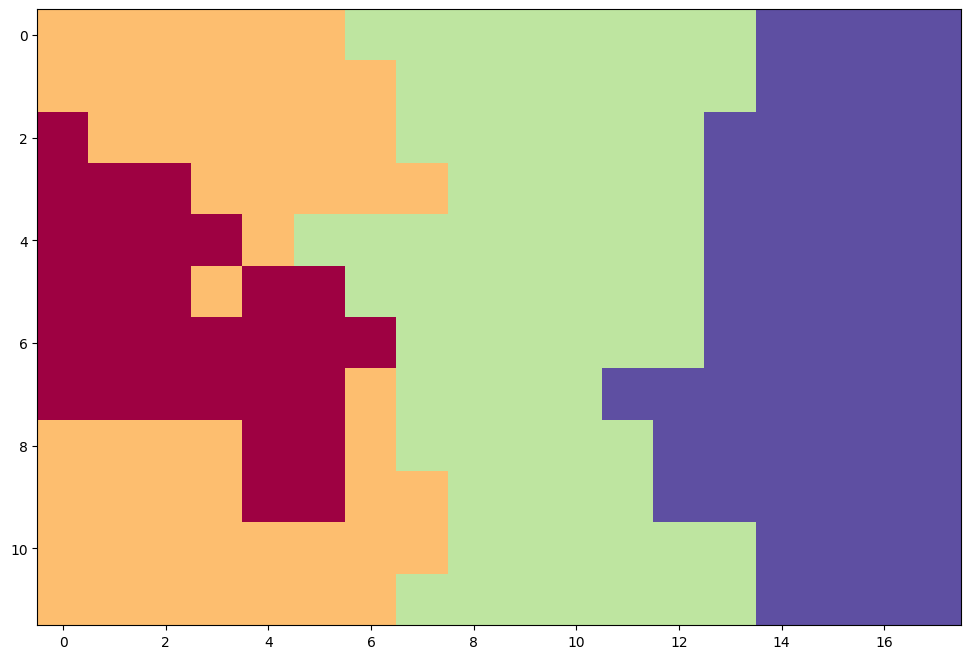

In [ ]:
#Plotando imagem classificada
plt.imshow(classif, cmap='Spectral_r')
plt.show()

In [ ]:
centros.shape

(6, 8)

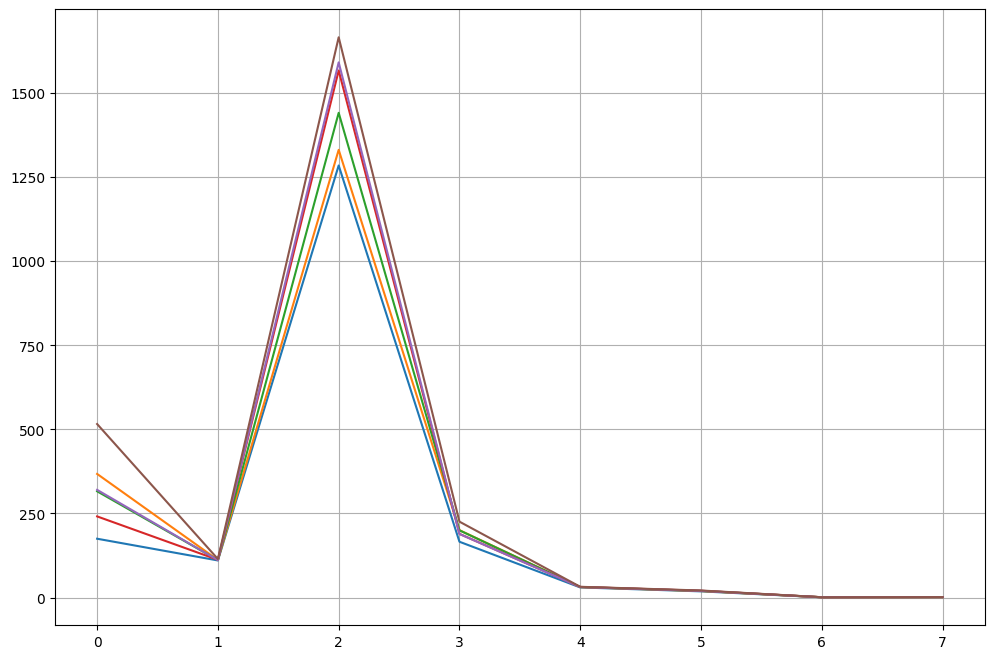

In [ ]:
#Visualizando centróides
plt.figure()

for i in range(centros.shape[0]):
    plt.plot(centros[i])

plt.grid()

In [ ]:
meta.update({'count':1})

In [ ]:
#Salvando imagem em disco
with rio.open('/content/drive/MyDrive/00_vegetation_data/raster_terraclim/Class-6_Kmeans_colab_1984-2022.tif', 'w', **meta) as src:
  src.write(classif,1)

### Classificação com com Scikit-learn

In [ ]:
# Classificando com Scikit-learn
from sklearn import cluster

In [ ]:
# Criando matrix com bandas em colunas
X = img.reshape(img.shape[0] * img.shape[1], img.shape[2])

In [ ]:
# Criando modelo
k_means = cluster.KMeans(n_clusters=6, max_iter=100)
k_means.fit(X)

X_clusters = k_means.labels_
X_clusters = X_clusters.reshape(img[:,:,0].shape)

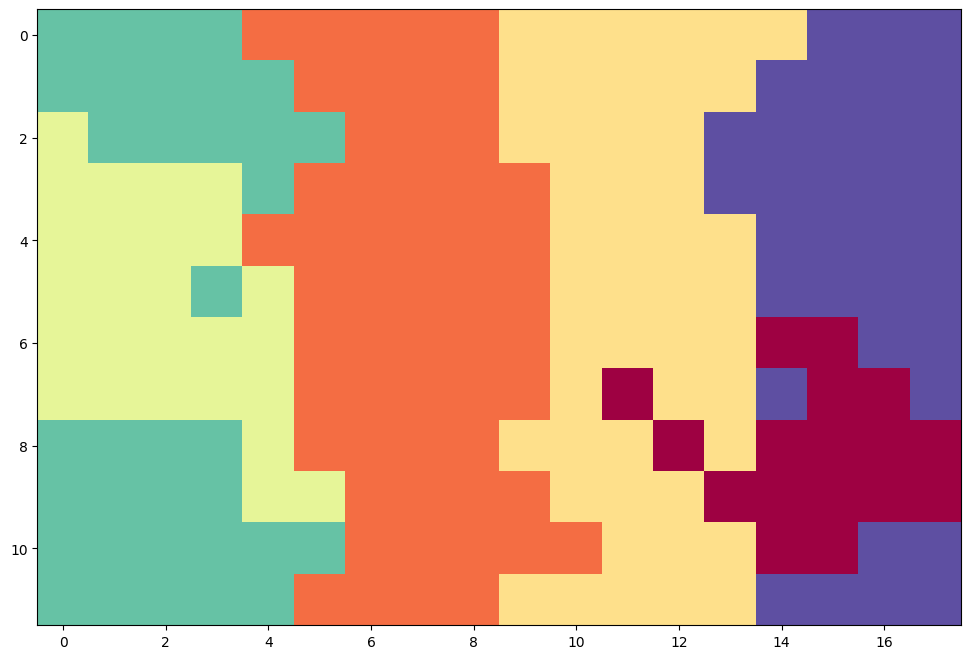

In [ ]:
# Visualizando resultado
plt.imshow(X_clusters, cmap = 'Spectral_r')

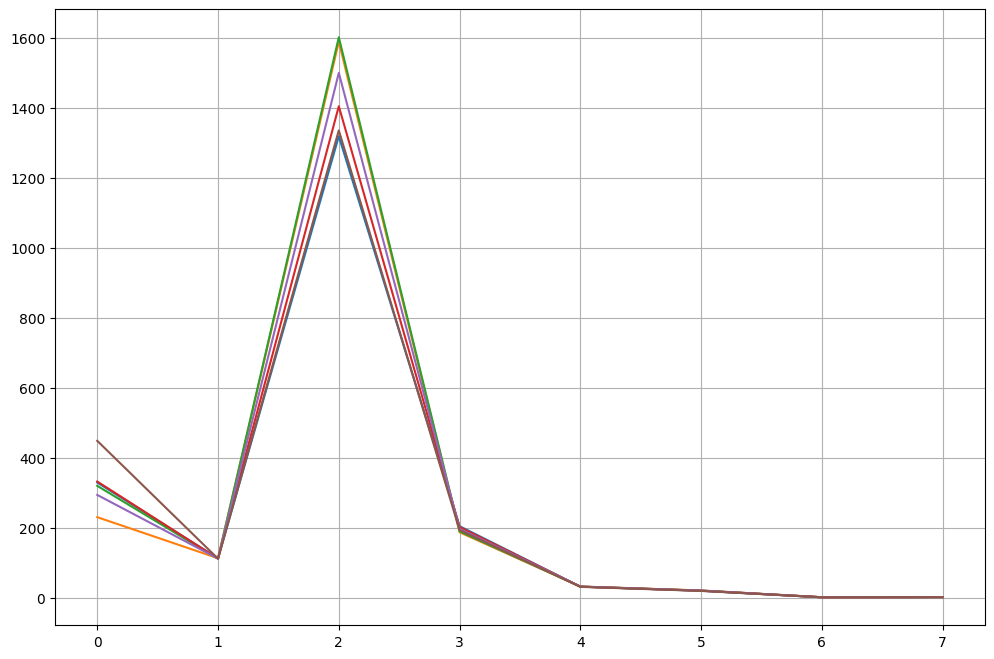

In [ ]:
# Visualizando centróides

cent = k_means.cluster_centers_
plt.figure()

for i in range(cent.shape[0]):
    plt.plot(cent[i])

plt.grid()

In [ ]:
#Salvando imagem em disco
with rio.open('/content/drive/MyDrive/00_vegetation_data/raster_terraclim/Class-6_Kmeans_sklearn_1984-2022.tif', 'w', **meta) as src:
  src.write(X_clusters,1)

### Classificação com RSGISLib

#### Instalando conda

In [ ]:
# instalando condacolab  # https://pypi.org/project/condacolab/
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:07
🔁 Restarting kernel...


In [ ]:
# verificando instalação
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


#### Instalando bibliotecas

In [ ]:
!sed -i '/cudatoolkit/d' /usr/local/conda-meta/pinned #para resolver problema com a instalação de pacotes no condacolab (jan/2024)

In [ ]:
#Instalando bibliotecas
!conda install -c conda-forge rsgislib==5.0.13 ##5.0.13 # versão atual 5.0.14 não está estável até a data (03-07-23)
!conda install -q geopandas
!conda install -q matplotlib
!conda install -q rasterio
!conda install -q PyQt5
!conda install -q sklearn-contrib-lightning
!conda install -q matplotlib-scalebar
!conda install -q spectral

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
\ | / - \ | / - \ | / - \ | / - \ | / - \ | / failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - nothing provides libuuid 1.0.* needed by postgresql-10.2-py27_0

Could not solve for environment specs
The following packages are incompatible
├─ mamba >=1.5.5  is installable with the potential options
│  ├─ mamba 1.5.5 would require
│  │  └─ openssl >=3.2.0,<4.0a0 , which can be installed;
│  ├─ mamba [1.5.5|1.5.6|1.5.7|1.5.8] would require
│  │  └─ python >=3.11,<3.12.0a0 , which can be installed;
│  ├─ mamba [1.5.5|1.5.6|1.5.7|1.5.8] would require
│  │  └─ python >=3.12,<3.13.0a0 , which can be installed;
│  ├─ mamba [1.5.5|1.5.6|1.5.7|1.5.8] would require
│  │  └─ python >=3.8,<3.9.0a0 , which can be installed;
│  ├─ mamba [1.5.5|1.5.6|1.5.7|1.5.8] would requir

In [ ]:
# Verificando os pacote/bibliotecas instaladas
# !conda list

#### Importando bibliotecas

In [ ]:
# Importando Bibliotecas

import rsgislib
from osgeo import gdal, ogr
import geopandas as gpd
import pandas as pd
# from rsgislib.segmentation import shepherdseg # para segmentação
# import rsgislib.tools.mapping

# Importando módulos da biblioteca padrão do python

import os
import pprint
import random

# Importar os módulos da biblioteca RSGISLib para classificação

# import rsgislib.classification
import rsgislib.classification.classratutils
import rsgislib.classification.classsklearn
import rsgislib.rastergis
import rsgislib.tools.filetools
import rsgislib.imageutils
import rsgislib.tools.utils
import rsgislib.vectorutils
import rsgislib.vectorutils.createrasters
import rsgislib.vectorutils.createvectors
import rsgislib.zonalstats

  # Importar os módulos para normalizar imagem
from rsgislib.imageutils import STRETCH_LINEARMINMAX, STRETCH_LINEARSTDDEV

  # Importar biblioteca scikit-learn
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from rios import rat

# visualização
from matplotlib import colors
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import axes
# import tifffile as tif
from spectral import imshow, save_rgb
# import cv2
# import tifffile as tif


# análises
from rsgislib import imagecalc


# Import the matplotlib plotting module and set it to work within
# a notebook environment.
%matplotlib inline
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# RSGISLib Modules
import rsgislib.classification.clustersklearn
import rsgislib.tools.mapping

from sklearn.cluster import MiniBatchKMeans
import rasterio as rio
import numpy as np

/usr/local/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [ ]:
# Input Sentinel-2 image file with 20 m resolution pixels.
# input_img = "/content/drive/MyDrive/00_vegetation_data/img_clima_1984-2022_ok.tif"
input_img = "/content/drive/MyDrive/00_vegetation_data/raster_terraclim/stack_TerraClim_1984-2022_srtm.tif"

In [ ]:
#A function to retrieve the image size in pixels.
x_size, y_size = rsgislib.imageutils.get_img_size(input_img)
#A function to retrieve the number of image bands in an image file.
n_bands = rsgislib.imageutils.get_img_band_count(input_img)
#Gets the shorthand file format for the input image in uppercase.
gdal_format = rsgislib.imageutils.get_gdal_format_name(input_img)
#A function to retrieve the image resolution.
x_res, y_res = rsgislib.imageutils.get_img_res(input_img)
#A function to retrieve the no data value for the image (from band; default 1).
no_data_val = rsgislib.imageutils.get_img_no_data_value(input_img)

In [ ]:
print(x_size, y_size, 'nº bands =', n_bands, 'format =', gdal_format, 'image resolution =', x_res,
      'no data val =', no_data_val)

18 12 nº bands = 8 format = GTIFF image resolution = 0.0416638628774634 no data val = None


In [ ]:
#A function to set the no data value for an image. If band is not specified sets value for all bands.
rsgislib.imageutils.set_img_no_data_value(input_img, 0.0)

In [ ]:
#A function which returns the WKT string representing the projection of the input image.
rsgislib.imageutils.get_wkt_proj_from_img(input_img)

'GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'

Image Data Size: 18 x 12


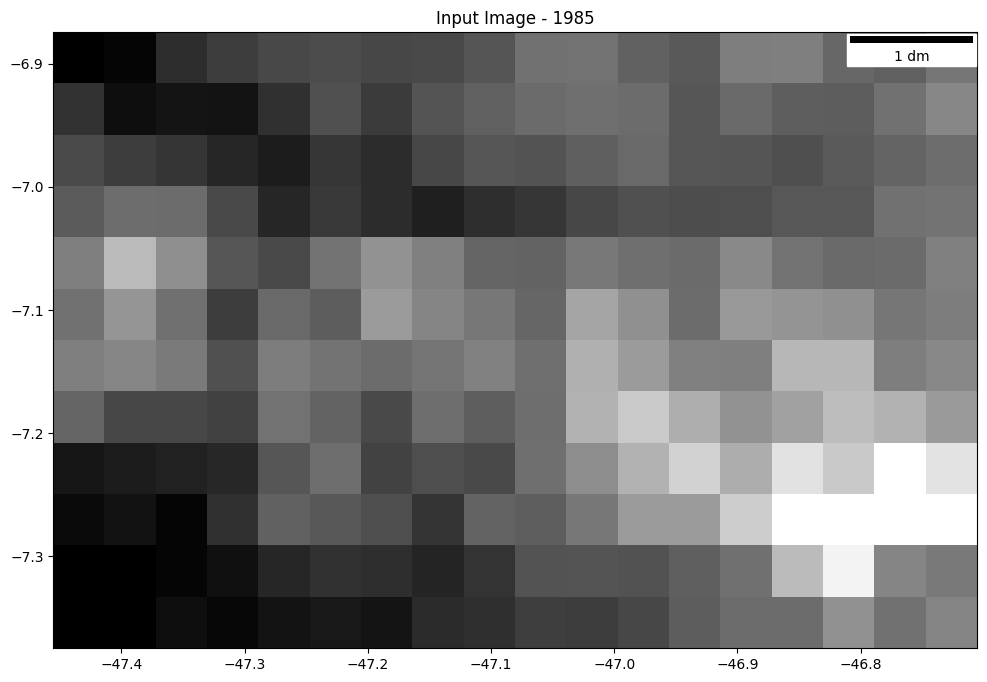

In [ ]:
# Vizualizando input arquivo raster
fig, (ax1) = plt.subplots(1, figsize=(16, 8), sharey=True)

rsgislib.tools.mapping.create_raster_img_map(
    ax1,
    input_img,
    img_bands=[1, 1, 1],
    img_stch=rsgislib.IMG_STRETCH_CUMULATIVE)
ax1.title.set_text("Input Image - 1985")

Image Data Size: 18 x 12
Image Data Size: 18 x 12


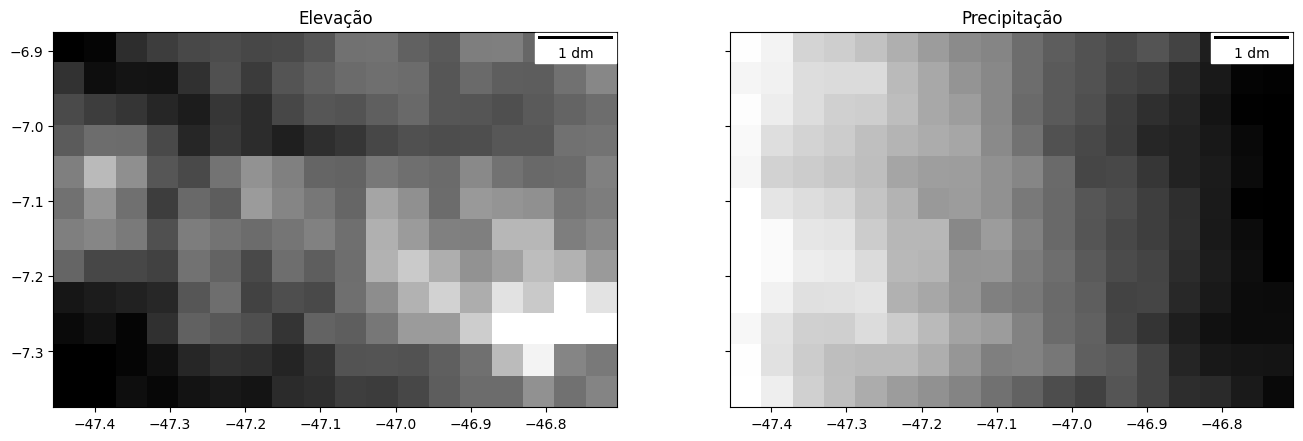

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

rsgislib.tools.mapping.create_raster_img_map(
    ax1,
    input_img,
    img_bands=[1, 1, 1],
    img_stch=rsgislib.IMG_STRETCH_CUMULATIVE)
ax1.title.set_text("Elevação")

# Add the segmentation output to the second axis.
rsgislib.tools.mapping.create_raster_img_map(
    ax2,
    input_img,
    img_bands=[3, 3, 3],
    img_stch=rsgislib.IMG_STRETCH_CUMULATIVE)
ax2.title.set_text("Precipitação")

In [ ]:
# Conferindo dado raster
with rio.open(input_img) as src:
    img = src.read()
img = img.transpose([1,2,0])
img.shape

(1754, 2516, 8)

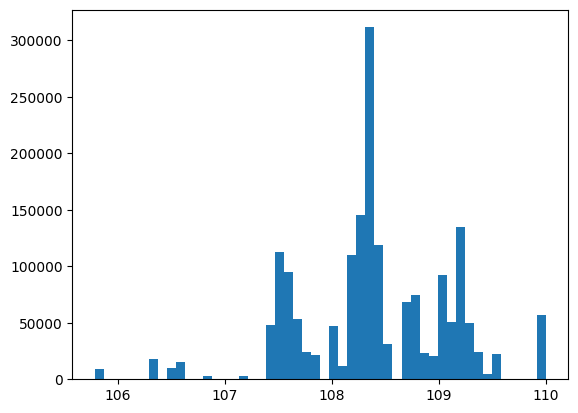

In [ ]:
# Observando distribuição de histogramas
#plt.hist(img[:,:,4].flatten(), bins=100)
plt.hist(img[:,:,1].flatten(), bins=50)
#plt.hist(img[:,:,4].flatten(), bins=20)
#plt.hist(img[:,:,4].flatten(), bins=255)
plt.show()

In [ ]:
##KMeans Clusterer

# Define the number of output classes/clusters as 10.
clusterer = MiniBatchKMeans(batch_size=100, n_clusters=6)

out_cls_img = "img_clima_1984-2022_kmeans_cls.kea"

rsgislib.classification.clustersklearn.img_pixel_sample_cluster(
    input_img,
    out_cls_img,
    gdalformat="KEA",
    no_data_val=0,
    n_img_smpl=10,
    clusterer=clusterer,
    calc_stats=True,
    use_mean_shift_est_band_width=False,
)

/usr/local/lib/python3.10/site-packages/rsgislib/imageutils/__init__.py (line 3029):
/usr/local/lib/python3.10/site-packages/rios/imagereader.py (line 694):


Sample input image:


100%|██████████| 1/1 [00:00<00:00, 474.04it/s]
/usr/local/lib/python3.10/site-packages/rsgislib/classification/clustersklearn.py (line 102):


Fit Clusterer
Fitted Clusterer
Apply to whole image:


100%|██████████| 1/1 [00:00<00:00, 79.11it/s]


In [ ]:
!gdalwarp -of KEA  "/content/drive/MyDrive/00_vegetation_data/data/raster/1995/result_segs/seg_1995_90-400.tif" "/content/drive/MyDrive/00_vegetation_data/data/raster/1995/result_segs/seg_1995_90-400.kea"

Image Data Size: 18 x 12
Image Data Size: 18 x 12


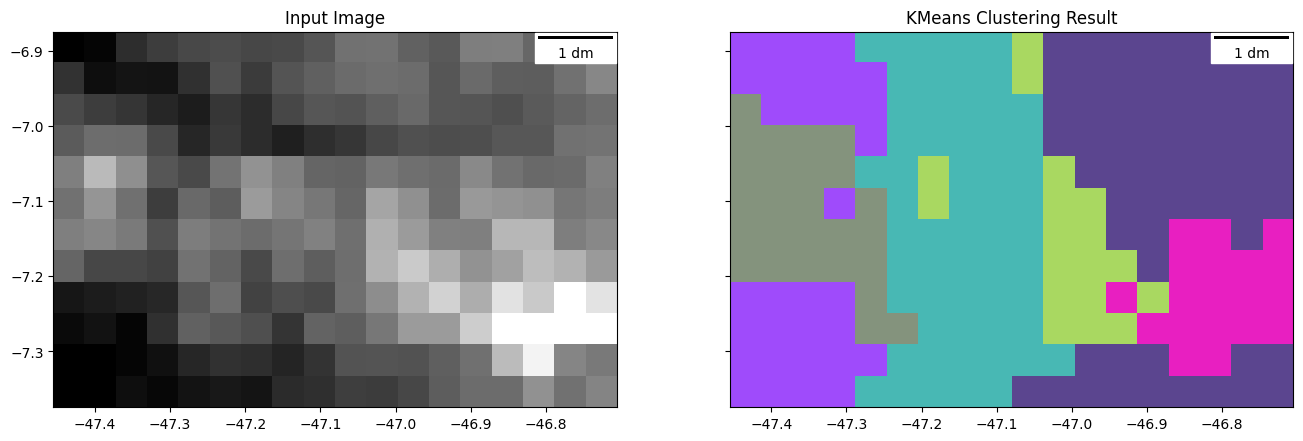

In [ ]:
# Define a bbox for the subset to be displayed
# sub_img_bbox = [275000, 300000, 275000, 300000]
# sub_img_bbox = [255000, 280000, 275000, 300000]
# sub_img_bbox = [295000, 300000, 295000, 300000]

# Create the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

rsgislib.tools.mapping.create_raster_img_map(
    ax1,
    input_img,
    img_bands=[1,1,1],
    img_stch=rsgislib.IMG_STRETCH_CUMULATIVE,
    # bbox=sub_img_bbox,
    show_scale_bar=True,
)
ax1.title.set_text("Input Image")

# Add the classification to the second axis.
rsgislib.tools.mapping.create_thematic_raster_map(ax2, out_cls_img)
ax2.title.set_text("KMeans Clustering Result")

In [ ]:
#Converter KEA para TIFF
!gdal_translate -of GTIFF "/content/img_clima_1984-2022_kmeans_cls.kea" "/content/drive/MyDrive/00_vegetation_data/raster_terraclim/Class-6_Kmeans_algoritm-rsgislib.tif"

Input file size is 18, 12
ERROR 1: Class-6_Kmeans_algoritm-rsgislib.tif: Unable to export color table to GeoTIFF file.  Color tables can only be written to 1 band or 2 bands Byte or UInt16 GeoTIFF files.
ERROR 1: PROJ: proj_create_from_name: Open of /usr/local/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.


##Referências

- [Index Database](https://www.indexdatabase.de)
- [Awesome Spectral Indices](https://github.com/awesome-spectral-indices/awesome-spectral-indices)
- [Geemap](https://geemap.org/common/?h=inde#geemap.common.ee_to_geojson)
- [Tutotial Spyndex](https://spyndex.readthedocs.io/en/latest/tutorials.html)
- [Tutorial RSGISLib](https://github.com/remotesensinginfo/rsgislib-tutorials)